In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
#train dataset
df = pd.read_csv('Aps_training_set_edited.csv', on_bad_lines= 'skip')

In [3]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [5]:
df.replace('neg', -1, inplace=True)
df.replace('pos', 1, inplace=True)
df.replace('na', np.NaN, inplace= True)
df=df.apply(pd.to_numeric)

In [6]:
df.dtypes

class       int64
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [7]:
y_train=df['class']

In [8]:
y_train.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: class, dtype: int64

In [9]:
y_train.shape

(60000,)

In [11]:
df.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(2)
memory usage: 78.3 MB


In [13]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-1,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,-1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,-1,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,-1,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,-1,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [14]:
df.isnull().sum().sum()

850015

In [15]:
count_missing_values=[]
for i in df.columns:
    count_missing_values.append(df[i].isnull().sum())
print(count_missing_values)

[0, 0, 46329, 3335, 14861, 2500, 2500, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 645, 629, 629, 4400, 642, 629, 642, 589, 642, 589, 2723, 629, 629, 629, 2500, 2501, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 688, 688, 688, 688, 688, 688, 688, 688, 688, 688, 645, 2725, 2727, 2503, 2500, 642, 642, 589, 589, 23034, 27277, 39549, 44009, 46333, 47740, 48722, 49264, 726, 167, 691, 691, 3257, 473, 2723, 4356, 726, 3255, 676, 2502, 14861, 14861, 14861, 338, 338, 338, 9553, 9877, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 14861, 2724, 691, 46329, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 13808, 13808, 13808, 13808, 13808, 13808, 13808, 13808, 13808, 2503, 2724, 4008, 4008, 4008, 4006, 4007, 4007, 4008, 4009, 691, 2724, 2726, 2726, 2726, 2727, 2727, 2726, 2726, 2723, 2724, 2723, 2723, 4007, 10239, 9553, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 2724, 2723]


In [16]:
#Now we are going to drop columns which have more than 45000 null values
df2=df.iloc[:,1:]
df2.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [17]:
df=df2.drop(df.columns[(df.isnull().sum()>45000)],axis=1)

In [18]:
df.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [19]:
df.shape

(60000, 164)

In [20]:
df.dtypes

aa_000      int64
ac_000    float64
ad_000    float64
ae_000    float64
af_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 164, dtype: object

In [21]:
df.isnull().sum().sum()

565298

In [22]:
#filling remaining null values
df=df.fillna(method='ffill')

In [23]:
df.isnull().sum().sum()

0

In [24]:
df.corr()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,-0.019911,-0.001590,0.043926,0.062828,0.018677,0.142660,0.284631,0.493000,0.603544,...,0.727299,0.733814,0.712872,0.721545,0.721240,0.601923,0.468095,0.246414,0.012571,0.024571
ac_000,-0.019911,1.000000,-0.001830,-0.005257,-0.010694,0.016977,-0.001560,-0.006848,-0.026693,-0.035378,...,-0.005982,-0.004120,-0.007475,-0.004770,-0.013748,-0.021711,0.016214,0.022432,-0.006565,0.013761
ad_000,-0.001590,-0.001830,1.000000,-0.000169,-0.000212,-0.000043,-0.000115,-0.000231,-0.000472,-0.000749,...,-0.001524,-0.001530,-0.001496,-0.001240,-0.001205,-0.000804,-0.001242,-0.000721,-0.000083,-0.000096
ae_000,0.043926,-0.005257,-0.000169,1.000000,0.824792,-0.000423,-0.000577,0.002569,0.021981,0.045335,...,0.012523,0.018900,0.013896,0.027490,0.059973,0.035638,-0.006834,-0.005749,0.067634,0.039911
af_000,0.062828,-0.010694,-0.000212,0.824792,1.000000,-0.000545,-0.001025,0.005467,0.033974,0.069164,...,0.023254,0.035062,0.023149,0.044945,0.091778,0.047367,-0.010411,-0.007928,0.102315,0.059077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.601923,-0.021711,-0.000804,0.035638,0.047367,0.000288,0.044019,0.182306,0.505382,0.736821,...,0.452385,0.446354,0.437404,0.379763,0.546310,1.000000,0.225452,0.061329,-0.001522,0.000580
ee_008,0.468095,0.016214,-0.001242,-0.006834,-0.010411,-0.000848,0.004857,0.009429,0.021230,0.056765,...,0.451885,0.481419,0.459971,0.407343,0.374339,0.225452,1.000000,0.708847,-0.005950,-0.002875
ee_009,0.246414,0.022432,-0.000721,-0.005749,-0.007928,-0.001242,-0.004276,-0.009425,-0.019286,-0.017584,...,0.226848,0.238746,0.224216,0.190131,0.163314,0.061329,0.708847,1.000000,-0.003457,-0.001008
ef_000,0.012571,-0.006565,-0.000083,0.067634,0.102315,-0.000081,0.001787,0.006871,0.013055,0.014152,...,0.003721,0.011844,0.003273,0.032286,0.004725,-0.001522,-0.005950,-0.003457,1.000000,0.282216


In [25]:
#standardizing dataset
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()
X_train=scaler.fit_transform(df)

In [27]:
#Now we have X_train and y_train dataset
print(X_train.shape)
print(y_train.shape)

(60000, 164)
(60000,)


### Now we are going to perform same steps for testing data

In [28]:
#import data
#test data
data=pd.read_csv('test_data_edited.csv')

In [29]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [30]:
data.replace('neg',-1,inplace=True)
data.replace('pos',1,inplace=True)
data.replace('na', np.NaN, inplace=True)
data=data.apply(pd.to_numeric)

In [31]:
data.dtypes

class       int64
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [32]:
y_test=data['class']
y_test.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: class, dtype: int64

In [33]:
y_test.shape

(16000,)

In [34]:
data.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(2)
memory usage: 20.9 MB


In [36]:
data.isnull().sum().sum()

228680

In [37]:
count_missing_values=[]
for i in data.columns:
    count_missing_values.append(data[i].isnull().sum())
print(count_missing_values)

[0, 0, 12363, 926, 3981, 690, 690, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 175, 163, 163, 1198, 169, 163, 169, 162, 169, 162, 764, 163, 163, 163, 688, 688, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 175, 764, 764, 690, 689, 169, 169, 162, 162, 6094, 7226, 10546, 11713, 12376, 12721, 12981, 13129, 202, 28, 190, 190, 866, 107, 763, 1206, 202, 865, 185, 688, 3981, 3981, 3981, 86, 86, 86, 2459, 2578, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 3981, 763, 190, 12363, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 3718, 3718, 3718, 3718, 3718, 3718, 3718, 3718, 3718, 688, 764, 1094, 1094, 1094, 1094, 1094, 1094, 1094, 1094, 190, 764, 764, 764, 764, 764, 764, 764, 764, 764, 764, 762, 762, 1094, 2644, 2459, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 762, 762]


In [38]:
#Now we are going to drop columns which have more than 12000 null values
data2=data.iloc[:,1:]
data2.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [39]:
data=data2.drop(data.columns[(data.isnull().sum()>12000)],axis=1)

In [40]:
data.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,20.0,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,4736.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82,68.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,748.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002,212.0,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,1358536.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,123922.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814,156.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [41]:
data.shape

(16000, 164)

In [42]:
#filling remaining null values
data=data.fillna(method='bfill')

In [43]:
data.isnull().sum().sum()

8

In [44]:
data=data.fillna(method='ffill')

In [45]:
data.isnull().sum().sum()

0

In [46]:
data.corr()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.003082,0.022145,0.014339,0.016217,0.019826,0.049591,0.158065,0.219255,0.230372,...,0.238489,0.248285,0.245274,0.258650,0.272230,0.237835,0.140002,0.067129,0.004951,0.000694
ac_000,0.003082,1.000000,0.029417,-0.003365,-0.010262,0.002772,-0.004710,-0.010080,-0.020698,-0.027577,...,-0.009609,-0.007873,-0.009026,-0.014687,-0.018309,-0.010881,0.004594,0.009146,-0.007411,0.019683
ad_000,0.022145,0.029417,1.000000,0.009457,0.019616,0.001407,0.004794,0.018626,0.034320,0.046025,...,0.104692,0.080331,0.059588,0.046640,0.054288,0.025421,0.025645,0.022031,0.005361,0.002476
ae_000,0.014339,-0.003365,0.009457,1.000000,0.877238,-0.001033,-0.001286,-0.002780,0.009035,0.045887,...,0.014618,0.022804,0.010445,0.017402,0.087509,0.028747,-0.008883,-0.007981,0.014020,0.004183
af_000,0.016217,-0.010262,0.019616,0.877238,1.000000,-0.001142,-0.001421,-0.003001,0.010466,0.051467,...,0.013057,0.023217,0.010890,0.021921,0.101437,0.023274,-0.011756,-0.009148,0.014042,0.005370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.237835,-0.010881,0.025421,0.028747,0.023274,0.103611,0.125325,0.196317,0.411118,0.630442,...,0.401902,0.385810,0.357507,0.385816,0.540679,1.000000,0.240148,0.068737,0.003014,-0.001528
ee_008,0.140002,0.004594,0.025645,-0.008883,-0.011756,0.009104,0.006625,0.008176,0.019723,0.062740,...,0.413571,0.442970,0.419945,0.361575,0.345799,0.240148,1.000000,0.634837,-0.004004,-0.001639
ee_009,0.067129,0.009146,0.022031,-0.007981,-0.009148,-0.000610,-0.003393,-0.008890,-0.015869,-0.009591,...,0.213496,0.225434,0.209250,0.164000,0.143220,0.068737,0.634837,1.000000,-0.003226,-0.001913
ef_000,0.004951,-0.007411,0.005361,0.014020,0.014042,-0.000388,0.002113,0.014689,0.020242,0.021120,...,0.002431,0.002746,0.003385,0.044382,0.020583,0.003014,-0.004004,-0.003226,1.000000,0.096813


In [47]:
X_test= scaler.transform(data)

In [48]:
#Now we have X_test and y_test dataset
print(X_test.shape)
print(y_test.shape)

(16000, 164)
(16000,)


In [49]:
#1. First we create logistic regression model
from sklearn.linear_model import LogisticRegression

In [50]:
lr= LogisticRegression()

In [51]:
lr.fit(X_train,y_train)

LogisticRegression()

In [52]:
y_pred= lr.predict(X_test)

In [53]:
#1. Evaluating model by accuracy score and classification report
from sklearn.metrics import accuracy_score, classification_report

In [54]:
print(accuracy_score(y_pred,y_test))

0.98975


In [55]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       1.00      0.99      0.99     15685
           1       0.70      0.83      0.76       315

    accuracy                           0.99     16000
   macro avg       0.85      0.91      0.88     16000
weighted avg       0.99      0.99      0.99     16000



In [56]:
#2. Evaluating model by F1 score
from sklearn.metrics import confusion_matrix

In [57]:
conf_mat= confusion_matrix(y_pred,y_test)

In [58]:
conf_mat

array([[15573,   112],
       [   52,   263]], dtype=int64)

In [59]:
TP= conf_mat[0][0]
FP= conf_mat[0][1]
FN= conf_mat[1][0]
TN= conf_mat[1][1]

In [60]:
#Accuracy
Accuracy= (TP+TN)/(TP+FP+FN+TN)
Accuracy

0.98975

In [61]:
#Precison
Precison= TP/(TP+FP)
Precison

0.992859419827861

In [62]:
#Recall
Recall= TP/(TP+FN)
Recall

0.996672

In [63]:
#F1-score
F1_score = 2*(Recall*Precison)/ (Recall+Precison)
F1_score

0.9947620568508465

In [64]:
#3. Evaluating model by roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve

In [65]:
roc_auc_score(y_pred,y_test)

0.913890027374248

In [66]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred) 

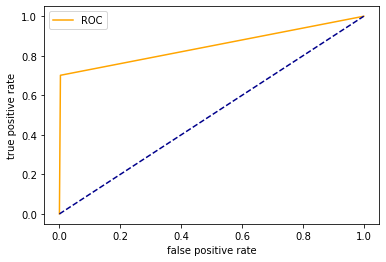

In [67]:
plt.plot(fpr,tpr, color= 'orange', label= 'ROC')
plt.plot([0,1],[0,1], color= 'darkblue', linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

In [70]:
from sklearn.svm import SVC

In [72]:
svc1=SVC(kernel='poly')

In [73]:
svc1.fit(X_train,y_train)

SVC(kernel='poly')

In [74]:
y_pred= svc1.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred)

0.9905

In [77]:
#now we are creating model with random forest classifier
from sklearn.ensemble import RandomForestClassifier


In [78]:
rfc=RandomForestClassifier()

In [79]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
y_pred=rfc.predict(X_test)

In [83]:
accuracy_score(y_pred,y_test)

0.9923125